In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [30]:
data= pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [33]:
print(data.columns)

# Update the rubrics and column names based on your actual data
parental_edu_score_rubric = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

race_rubric = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    "group D": 3,
    "group E": 4,
}

lunch_rubric = {'standard': 1, 'free/reduced': 0}
course_rubric = {'none': 0, 'completed': 1}
gender_rubric = {'female': 0, 'male': 1}

# Assuming the correct column names based on your data
categorical_columns = ['parental level of education', 'lunch', 'test preparation course', 'gender']

# Map the rubrics to the corresponding columns
data['parental_edu'] = data['parental level of education'].map(parental_edu_score_rubric)
data['.lunch'] = data['lunch'].map(lunch_rubric)
data['test_prep'] = data['test preparation course'].map(course_rubric)
data['.gender'] = data['gender'].map(gender_rubric)
data['race'] = data['race/ethnicity'].map(race_rubric)

data.head(20)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental_edu,.lunch,test_prep,.gender,race
0,female,group B,bachelor's degree,standard,none,72,72,74,4,1,0,0,1
1,female,group C,some college,standard,completed,69,90,88,2,1,1,0,2
2,female,group B,master's degree,standard,none,90,95,93,5,1,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,3,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,2,1,0,1,2
5,female,group B,associate's degree,standard,none,71,83,78,3,1,0,0,1
6,female,group B,some college,standard,completed,88,95,92,2,1,1,0,1
7,male,group B,some college,free/reduced,none,40,43,39,2,0,0,1,1
8,male,group D,high school,free/reduced,completed,64,64,67,1,0,1,1,3
9,female,group B,high school,free/reduced,none,38,60,50,1,0,0,0,1


<Axes: >

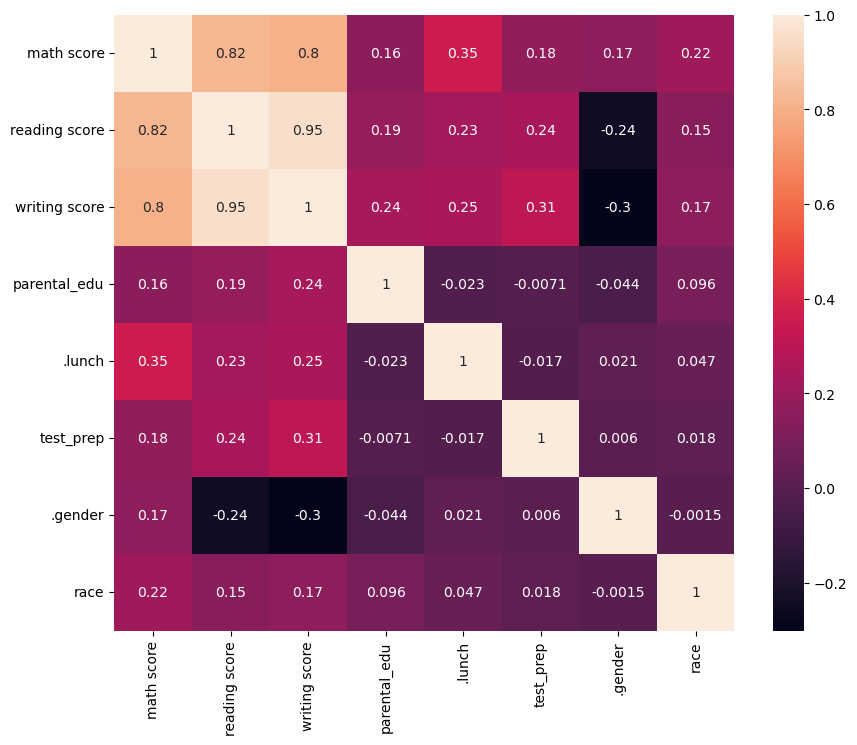

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method='pearson'),annot=True, )

In [34]:
data=data.drop('lunch',axis=1)
data=data.drop('gender',axis=1)
data=data.drop('race/ethnicity',axis=1)
data=data.drop('parental level of education',axis=1)
data=data.drop('test preparation course',axis=1)



In [35]:
data.head(15)

,math score,reading score,writing score,parental_edu,.lunch,test_prep,.gender,race
0,72,72,74,4,1,0,0,1
1,69,90,88,2,1,1,0,2
2,90,95,93,5,1,0,0,1
3,47,57,44,3,0,0,1,0
4,76,78,75,2,1,0,1,2
5,71,83,78,3,1,0,0,1
6,88,95,92,2,1,1,0,1
7,40,43,39,2,0,0,1,1
8,64,64,67,1,0,1,1,3
9,38,60,50,1,0,0,0,1


In [36]:
y = data['math score']
X = data[[ 'parental_edu',
       '.lunch', 'test_prep','.gender','race','reading score',
       'writing score']]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44,shuffle=True)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7131097782755941

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


# Assuming X is your feature matrix and y is your target variable for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for k-nearest neighbors regression
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

# Instantiate GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Best Hyperparameters: {'n_neighbors': 9, 'p': 1}
R-squared: 0.734543325389105


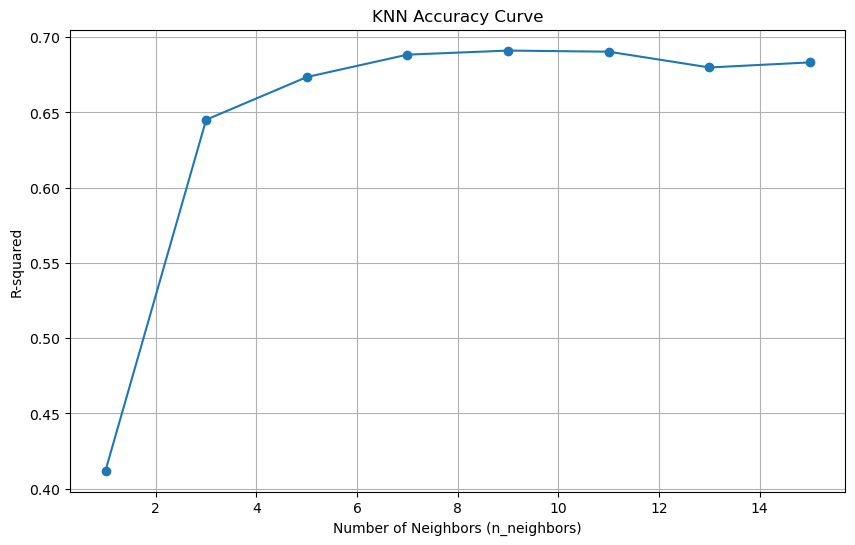

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Assuming X is your feature matrix and y is your target variable for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_neighbors values to try
n_neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store R-squared values
r2_values = []

# Iterate through different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Create a KNeighborsRegressor
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model to the training data
    knn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Store R-squared values for plotting
    r2_values.append(r2)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_values, marker='o')
plt.title('KNN Accuracy Curve')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()


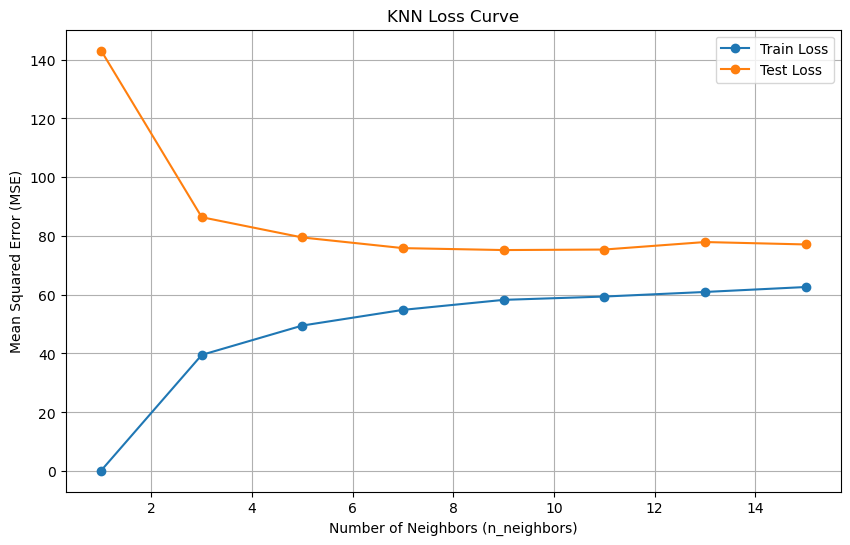

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_neighbors values to try
n_neighbors_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store training and test losses
train_losses = []
test_losses = []

# Iterate through different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Create a KNeighborsRegressor
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model to the training data
    knn_regressor.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = knn_regressor.predict(X_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Predict on the test set
    y_test_pred = knn_regressor.predict(X_test)
    test_loss = mean_squared_error(y_test, y_test_pred)
    test_losses.append(test_loss)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, train_losses, label='Train Loss', marker='o')
plt.plot(n_neighbors_values, test_losses, label='Test Loss', marker='o')
plt.title('KNN Loss Curve')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()
